In [5]:
!pip3 install --upgrade --user numexpr bottleneck pandas openpyxl


In [471]:
import pandas as pd

df = pd.read_csv('curricula_backup.tsv', sep='\t')
df

author                      title comment   curriculum  id  \
0          Андреев Л.Н.                  Жили-были     NaN  19 ИРЛ 2 ст   1   
1          Андреев Л.Н.                       Иуда     NaN  19 ИРЛ 2 ст   1   
2          Андреев Л.Н.  Рассказ о семи повешенных     NaN  19 ИРЛ 2 ст   1   
3         Бальмонт К.Д.                        NaN     NaN  19 ИРЛ 2 ст   1   
4           Брюсов В.Я.                        NaN     NaN  19 ИРЛ 2 ст   1   
...                 ...                        ...     ...          ...  ..   
10301         Шиллер Ф.                 Разбойники     NaN     91 ПСОУЗ  50   
10302             Эсхил       Прометей прикованный     NaN     91 ПСОУЗ  50   
10303  Достоевский Ф.М.   Преступление и наказание     NaN     91 ПСОУЗ  50   
10304       Куприн А.И.         Гранатовый браслет     NaN     91 ПСОУЗ  50   
10305     Некрасов Н.А.                Коробейники     NaN     91 ПСОУЗ  50   

       year  grade priority  
0      1919      9      NaN  
1      1919      9      NaN  
2      1919      9        *  
3      1919      9        *  
4      1919      9        *  
...     ...    ...      ...  
10301  1991      9      NaN  
10302  1991      9      NaN  
10303  1991     10      NaN  
10304  1991     11        *  
10305  1991     10        *  

[10306 rows x 8 columns]

1938 и 1939 гг. 
1962 и 1963 гг.   
1966 и 1967 гг.
1967 и 1972 гг.

In [472]:
df.duplicated().sum()

11

In [473]:
df.drop_duplicates(inplace = True)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 10305
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      10034 non-null  object
 1   title       8752 non-null   object
 2   comment     443 non-null    object
 3   curriculum  10295 non-null  object
 4   id          10295 non-null  int64 
 5   year        10295 non-null  object
 6   grade       10295 non-null  int64 
 7   priority    5658 non-null   object
dtypes: int64(2), object(6)
memory usage: 723.9+ KB


In [475]:
years = ['1937-38', '1939', '1962', '1963', '1966', '1967', '1967', '1972']
df[df['year'].isin(years)].shape[0]/df.shape[0]

0.09305488101019913

In [476]:
df['year'].value_counts()

year
1991       519
1940       376
1939       375
1933       341
1982       282
1984       282
1983       281
1988       278
1987       278
1986       278
1985       278
1949       276
1950       273
1980       269
1981       265
1979       265
1975       264
1974       264
1978       264
1977       264
1976       264
1951       263
1941       263
1942       231
1934       214
1946       204
1948       200
1922       191
1973       188
1972       187
1944       187
1947       185
1919       160
1932       122
1964       116
1956       114
1963       113
1954       109
1965       107
1938       107
1966       104
1960       103
1959       103
1958       103
1957       103
1961       103
1967       102
1962        65
1937-38     12
Name: count, dtype: int64

удаленный датасет - df_del (10% удалено примерно)  
df - все годы

оставить только очищенный датасет
заолпнить пропуски имен и пропуски произведений

In [477]:
df_del = df.drop(df[df['year'].isin(years)].index)
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [480]:
df_del['title'] = df_del['title'].fillna('что-то')
df_del['author'] = df_del['author'].fillna('народ')

In [481]:
df_del.shape

(9337, 8)

In [479]:
df['year'] = df['year'].apply(lambda x: 1937 if x == '1937-38' else x)

In [482]:
df_del.year.value_counts()

year
1991    519
1940    376
1933    341
1984    282
1982    282
1983    281
1986    278
1985    278
1987    278
1988    278
1949    276
1950    273
1980    269
1981    265
1979    265
1974    264
1975    264
1976    264
1977    264
1978    264
1941    263
1951    263
1942    231
1934    214
1946    204
1948    200
1922    191
1973    188
1944    187
1947    185
1919    160
1932    122
1964    116
1956    114
1954    109
1965    107
1938    107
1961    103
1959    103
1958    103
1957    103
1960    103
Name: count, dtype: int64

In [483]:
import datetime as dt
df_del['year'] = pd.to_datetime(df_del['year'], format='%Y').dt.year
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

In [484]:
df_del.to_csv('del_s4.csv')
df.to_csv('s4.csv')

In [485]:
df = pd.read_csv('s4.csv')
df_del = pd.read_csv('del_s4.csv')

In [36]:
df

author                      title comment   curriculum  id  \
0          Андреев Л.Н.                  Жили-были     NaN  19 ИРЛ 2 ст   1   
1          Андреев Л.Н.                       Иуда     NaN  19 ИРЛ 2 ст   1   
2          Андреев Л.Н.  Рассказ о семи повешенных     NaN  19 ИРЛ 2 ст   1   
3         Бальмонт К.Д.                        NaN     NaN  19 ИРЛ 2 ст   1   
4           Брюсов В.Я.                        NaN     NaN  19 ИРЛ 2 ст   1   
...                 ...                        ...     ...          ...  ..   
10301         Шиллер Ф.                 Разбойники     NaN     91 ПСОУЗ  50   
10302             Эсхил       Прометей прикованный     NaN     91 ПСОУЗ  50   
10303  Достоевский Ф.М.   Преступление и наказание     NaN     91 ПСОУЗ  50   
10304       Куприн А.И.         Гранатовый браслет     NaN     91 ПСОУЗ  50   
10305     Некрасов Н.А.                Коробейники     NaN     91 ПСОУЗ  50   

       year  grade priority  
0      1919      9      NaN  
1      1919      9      NaN  
2      1919      9        *  
3      1919      9        *  
4      1919      9        *  
...     ...    ...      ...  
10301  1991      9      NaN  
10302  1991      9      NaN  
10303  1991     10      NaN  
10304  1991     11        *  
10305  1991     10        *  

[10295 rows x 8 columns]

In [54]:
pd.set_option('display.max_rows', 25)

    СМОТРИМ КАК В РАЗНЫХ ДАТАСЕТАХ МЕНЯЕТСЯ ТОП-50

ПОСМОТЕРТЬ КАК ЧАСТО НАЗВАНИЯ НЕ СХОДЯТСЯ С НАЗВАНИЕМ ПРОГРАММЫ

In [486]:
long = pd.DataFrame(df.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [487]:
long

author  count
0                                 Толстой Л.Н.     49
1                         Салтыков-Щедрин М.Е.     49
2                                   Горький М.     49
3                              Маяковский В.В.     48
4                                Тургенев И.С.     48
5                                   Чехов А.П.     48
6                              Островский А.Н.     48
7                                Некрасов Н.А.     48
8                              Добролюбов Н.А.     47
9                                  Фадеев А.А.     46
10                                 Пушкин А.С.     46
11                              Лермонтов М.Ю.     46
12                               Фурманов Д.А.     46
13                           Чернышевский Н.Г.     46
14                                 Гоголь Н.В.     46
15                              Грибоедов А.С.     46
16                              Белинский В.Г.     45
17                                 Герцен А.И.     45
18                                Шолохов М.А.     45
19                               Фонвизин Д.И.     45
20                                 Рылеев К.Ф.     44
21                                Радищев А.Н.     44
22                               Гончаров И.А.     44
23                              Ломоносов М.В.     43
24                                Толстой А.Н.     43
25                                  Шекспир У.     43
26                                Гладков Ф.В.     43
27                                   Гете И.В.     42
28                             Островский Н.А.     41
29                              Макаренко А.С.     40
30                            Серафимович А.С.     39
31                              Жуковский В.А.     39
32                                   Бедный Д.     38
33                            Твардовский А.Т.     38
34                               Державин Г.Р.     38
35                                   Блок А.А.     37
36                              Корнейчук А.Е.     36
37                                   Купала Я.     36
38                                 Крылов И.А.     36
39                                 Гончар О.Т.     34
40                                 Тычина П.Г.     34
41                                 Леонов Л.М.     34
42                                Писарев Д.И.     33
43                                   Байрон Д.     32
44                             Исаковский М.В.     31
45                                 Мольер Ж.Б.     31
46                                  Бальзак О.     30
47                                    Колас Я.     29
48                                 Катаев В.П.     28
49                                Тихонов Н.С.     27
50                               Шевченко Т.Г.     27
51                                  Киачели Л.     27
52                                     Джамбул     27
53                            Достоевский Ф.М.     27
54                              Стальский С.С.     27
55                              Короленко В.Г.     26
56                                 Сурков А.А.     26
57                                Симонов К.М.     25
58                               Карамзин Н.М.     24
59                          Лебедев-Кумач В.И.     24
60                              Багрицкий Э.Г.     24
61                                  Табидзе Г.     24
62                              Иванов Вс.Вяч.     24
63                                 Алигер М.И.     23
64                                 Тренев К.А.     23
65                               Горбатов Б.Л.     23
66                                    Лацис В.     22
67                                Кочетов В.А.     22
68                                Руставели Ш.     22
69                                 Куприн А.И.     22
70                                 Крымов Ю.С.     21
71                               Курочкин В.С.     21
72                                Погодин Н.Ф.     21
73                                 Есенин С.

In [488]:
short = pd.DataFrame(df_del.drop_duplicates(['author', 'year'])['author'].value_counts()).reset_index()

In [489]:
merged_df = long.join(short, how='outer', lsuffix='_long', rsuffix='_short')

        СЧИТАЕМ ДОЛИ НЕСХОДЯЩИХСЯ ПРОИЗВЕДЕНИЙ

In [491]:
pivot_df1 = df_del.pivot_table(index='title', columns='year', values='id', aggfunc='count').reset_index()

In [492]:
pivot_df1 = pivot_df1[pivot_df1.title != 'стихотворения']
pivot_df1 = pivot_df1[pivot_df1.title != 'критика']

In [493]:
pivot_df1 = pivot_df1.set_index('title')

for i in pivot_df1.columns:
    pivot_df1[i] = pivot_df1[i].apply(lambda x: 1 if x > 0 else 0)
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df1.columns:
    data[i] = []
    for j in pivot_df1.columns:
        data[i].append(((pivot_df1[i] - pivot_df1[j])**2).sum()/len(pivot_df1[1919]))
dataf1 = pd.DataFrame(data, index = pivot_df1.columns)

        СЧИТАЕМ ДОЛИ НЕСХОДЯЩИХСЯ АВТОРОВ

In [548]:
pivot_df = df_del.pivot_table(index='author', columns='year', values='title', aggfunc='count')
pivot_df.to_csv('for_clust_autors_titles_counted.csv')

            почему 40-й год выдается???

In [494]:
for i in pivot_df.columns:
    pivot_df[i] = pivot_df[i].apply(lambda x: 1 if x > 0 else 0)

In [495]:
data = {} # делаем матрицу, а потом датафрейм с долей несходящихся диагнозов
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append(((pivot_df[i] - pivot_df[j])**2).sum()/len(pivot_df[1919]))
dataf = pd.DataFrame(data, index = pivot_df.columns)

### СМОТРЕТЬ СЮДА

In [496]:
pivot_df

year                                       1919  1922  1932  1933  1934  1938  \
author                                                                          
Абашидзе И.В.                                 0     0     0     0     0     0   
Абрамов Ф.А.                                  0     0     0     0     0     0   
Аверченко А.Т.                                0     0     0     0     0     0   
Авижюс Й.                                     0     0     0     0     0     0   
Адамович А.М.                                 0     0     0     0     0     0   
Адамович Г.В.                                 0     0     0     0     0     0   
Ажаев В.Н.                                    0     0     0     0     0     0   
Айбек М.                                      0     0     0     0     0     0   
Айни С.                                       0     0     0     0     0     0   
Айтматов Ч.                                   0     0     0     0     0     0   
Акопян А.                                     0     0     0     1     0     0   
Аксаковы                                      0     1     0     0     0     0   
Аксёнов В.                                    0     0     0     0     0     0   
Александрович А.                              0     0     0     1     0     0   
Алексеев М.А.                                 0     0     0     0     0     0   
Алексеев С.П.                                 0     0     0     0     0     0   
Алигер М.И.                                   0     0     0     0     0     0   
Амп П.                                        0     0     0     1     1     0   
Андреев Л.Н.                                  1     1     0     1     1     1   
Анненский И.Ф.                                0     0     0     0     0     0   
Антокольский П.Г.                             0     0     0     0     0     0   
Антонов С.П.                                  0     0     0     0     0     0   
Антонович М.А.                                0     0     0     0     0     0   
Антоновская А.А.                              0     0     0     0     0     0   
Арбузов А.Н.                                  0     0     0     0     0     0   
Аристофан                                     1     0     0     0     0     0   
Асеев Н.Н.                                    0     0     0     0     0     1   
Астафьев В.П.                                 0     0     0     0     0     0   
Ауэзов М.                                     0     0     0     0     0     0   
Афанасьев А.                                  0     0     0     0     0     0   
Ахмадулина Б.А.                               0     0     0     0     0     0   
Ахматова А.А.                                 0     0     0     1     1     0   
Ахундов М.                                    0     0     0     0     0     0   
Бабаевский С.П.                               0     0     0     0     0     0   
Бабель И.Э.                                   0     0     0     0     0     1   
Багрицкий Э.Г.                                0     0     0     1     1     1   
Бажан М.П.                                    0     0     0     0     0     0   
Байрон Д.                                     0     0     0     1     1     0   
Бакланов Г.Я.                                 0     0     0     0     0     0   
Балашов Д.М.                                  0     0     0     0     0     0   
Бальзак О.                                    0     0     0     1     1     0   
Бальмонт К.Д.                                 1     1     0     0     0     0   
Бараташвили Н.                                0     0     0     0     0     0   
Баратынский Е.А.                              0     0     0     0     0     0   
Барбюс А.                                     0     0     0     1     1     0   
Батюшков К.Н.                                 0     0     0     0     0     0   
Бедный Д.                                     0     0     1     1     1     0   
Безыменский А.И.               

In [497]:
df_del['autitle'] = df_del['author'] + ' ' + df_del['title']
df_del['autitle'] 

0                          Андреев Л.Н. Жили-были
1                               Андреев Л.Н. Иуда
2          Андреев Л.Н. Рассказ о семи повешенных
3                            Бальмонт К.Д. что-то
4                              Брюсов В.Я. что-то
                          ...                    
9332                         Шиллер Ф. Разбойники
9333                   Эсхил Прометей прикованный
9334    Достоевский Ф.М. Преступление и наказание
9335               Куприн А.И. Гранатовый браслет
9336                    Некрасов Н.А. Коробейники
Name: autitle, Length: 9337, dtype: object

In [498]:
pivot_df_autt = df_del.pivot_table(index='autitle', columns='year', values='title', aggfunc='count')

In [499]:
for i in pivot_df_autt.columns:
    pivot_df_autt[i] = pivot_df_autt[i].apply(lambda x: 1 if x > 0 else 0)

In [506]:
pivot_df_autt.drop('summa', axis  = 1, inplace = True)

In [511]:
pivot_df_autt['summa'] = pivot_df_autt.sum(axis=1)
pivot_df_autt = pivot_df_autt.sort_values('summa', ascending = False)
top  = pivot_df_autt[pivot_df_autt['summa'] > 5]
top

year                                               1919  1922  1932  1933  \
autitle                                                                     
Грибоедов А.С. Горе от ума                            1     1     1     1   
Гоголь Н.В. Мертвые души                              1     1     1     1   
Пушкин А.С. Евгений Онегин                            1     1     1     1   
Горький М. Мать                                       1     1     1     1   
Некрасов Н.А. Кому на Руси жить хорошо                0     1     1     1   
...                                                 ...   ...   ...   ...   
Гроссман В.С. Народ бессмертен                        0     0     0     0   
Горький М. У нас и у них                              0     0     0     0   
народ Будьте здоровы (белорусская народная песня)     0     0     0     0   
Некрасов Н.А. Внимая ужасам войны                     0     0     0     0   
Роллан Р. Жан Кристоф                                 0     0     0     1   

year                                               1934  1938  1940  1941  \
autitle                                                                     
Грибоедов А.С. Горе от ума                            1     1     1     1   
Гоголь Н.В. Мертвые души                              1     1     1     1   
Пушкин А.С. Евгений Онегин                            1     1     1     1   
Горький М. Мать                                       1     1     1     1   
Некрасов Н.А. Кому на Руси жить хорошо                1     1     1     1   
...                                                 ...   ...   ...   ...   
Гроссман В.С. Народ бессмертен                        0     0     0     0   
Горький М. У нас и у них                              0     0     1     1   
народ Будьте здоровы (белорусская народная песня)     0     0     1     1   
Некрасов Н.А. Внимая ужасам войны                     0     0     0     0   
Роллан Р. Жан Кристоф                                 1     0     1     0   

year                                               1942  1944  ...  1981  \
autitle                                                        ...         
Грибоедов А.С. Горе от ума                            1     1  ...     1   
Гоголь Н.В. Мертвые души                              1     1  ...     1   
Пушкин А.С. Евгений Онегин                            1     1  ...     1   
Горький М. Мать                                       1     1  ...     1   
Некрасов Н.А. Кому на Руси жить хорошо                1     1  ...     1   
...                                                 ...   ...  ...   ...   
Гроссман В.С. Народ бессмертен                        0     1  ...     0   
Горький М. У нас и у них                              1     0  ...     0   
народ Будьте здоровы (белорусская народная песня)     1     0  ...     0   
Некрасов Н.А. Внимая ужасам войны                     0     0  ...     0   
Роллан Р. Жан Кристоф                                 0     0  ...     0   

year                                               1982  1983  1984  1985  \
autitle                                                                     
Грибоедов А.С. Горе от ума                            1     1     1     1   
Гоголь Н.В. Мертвые души                              1     1     1     1   
Пушкин А.С. Евгений Онегин                            1     1     1     1   
Горький М. Мать                                       1     1     1     1   
Некрасов Н.А. Кому на Руси жить хорошо                1     1     1     1   
...                                                 ...   ...   ...   ...   
Гроссман В.С. Народ бессмертен                        0     0     0     0   
Горький М. У нас и у них                              0     0     0     0   
народ Будьте здоровы (белорусская народная песня)     0     0     0     0   
Некрасов Н.А. Внимая ужасам войны                     0     0     0     0   
Роллан Р. Жан Кристоф                                 0     0     0     0   

year 

In [514]:
top.drop('summa', axis = 1, inplace = True)

C:\Users\Карина\AppData\Local\Temp\ipykernel_13404\2082279135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.drop('summa', axis = 1, inplace = True)


In [518]:
top[(top == 1)].isnull()

year                                                1919   1922   1932   1933  \
autitle                                                                         
Грибоедов А.С. Горе от ума                         False  False  False  False   
Гоголь Н.В. Мертвые души                           False  False  False  False   
Пушкин А.С. Евгений Онегин                         False  False  False  False   
Горький М. Мать                                    False  False  False  False   
Некрасов Н.А. Кому на Руси жить хорошо              True  False  False  False   
...                                                  ...    ...    ...    ...   
Гроссман В.С. Народ бессмертен                      True   True   True   True   
Горький М. У нас и у них                            True   True   True   True   
народ Будьте здоровы (белорусская народная песня)   True   True   True   True   
Некрасов Н.А. Внимая ужасам войны                   True   True   True   True   
Роллан Р. Жан Кристоф                               True   True   True  False   

year                                                1934   1938   1940   1941  \
autitle                                                                         
Грибоедов А.С. Горе от ума                         False  False  False  False   
Гоголь Н.В. Мертвые души                           False  False  False  False   
Пушкин А.С. Евгений Онегин                         False  False  False  False   
Горький М. Мать                                    False  False  False  False   
Некрасов Н.А. Кому на Руси жить хорошо             False  False  False  False   
...                                                  ...    ...    ...    ...   
Гроссман В.С. Народ бессмертен                      True   True   True   True   
Горький М. У нас и у них                            True   True  False  False   
народ Будьте здоровы (белорусская народная песня)   True   True  False  False   
Некрасов Н.А. Внимая ужасам войны                   True   True   True   True   
Роллан Р. Жан Кристоф                              False   True  False   True   

year                                                1942   1944  ...   1980  \
autitle                                                          ...          
Грибоедов А.С. Горе от ума                         False  False  ...  False   
Гоголь Н.В. Мертвые души                           False  False  ...  False   
Пушкин А.С. Евгений Онегин                         False  False  ...  False   
Горький М. Мать                                    False  False  ...  False   
Некрасов Н.А. Кому на Руси жить хорошо             False  False  ...  False   
...                                                  ...    ...  ...    ...   
Гроссман В.С. Народ бессмертен                      True  False  ...   True   
Горький М. У нас и у них                           False   True  ...   True   
народ Будьте здоровы (белорусская народная песня)  False   True  ...   True   
Некрасов Н.А. Внимая ужасам войны                   True   True  ...   True   
Роллан Р. Жан Кристоф                               True   True  ...   True   

year                                                1981   1982   1983   1984  \
autitle                                                                         
Грибоедов А.С. Горе от ума                         False  False  False  False   
Гоголь Н.В. Мертвые души                           False  False  False  False   
Пушкин А.С. Евгений Онегин                         False  False  False  False   
Горький М. Мать                                    False  False  False  False   
Некрасов Н.А. Кому на Руси жить хорошо             False  False  False  False   
...                                                  ...    ...    ...    ...   
Гроссман В.С. Народ бессмертен                      True   True   True   True   
Горький М. У нас и у них                            True   True   True   True   
народ Будьте здоровы (белорусская народная песня)   Tr

In [521]:
fig, ax = plt.subplots(figsize=(150,100))
sns_heatmap = sns.heatmap(top[(top == 1)].isnull(), yticklabels=True, xticklabels=True, cbar=False, cmap='viridis')

In [531]:
len(pivot_df_autt[1919])
pivot_df_autt1 = pivot_df_autt.drop('summa', axis = 1)

In [544]:
pivot_df_autt.to_csv('author-title.csv')

In [533]:
# с количеством произведений, а не бинарной

data = {} 
for i in pivot_df_autt1.columns:
    data[i] = []
    for j in pivot_df_autt1.columns:
        data[i].append((abs(pivot_df_autt1[i] - pivot_df_autt1[j])).sum()/len(pivot_df_autt1[1919]))
dataf2 = pd.DataFrame(data, index = pivot_df_autt1.columns)
dataf2

1919      1922      1932      1933      1934      1938      1940  \
year                                                                         
1919  0.000000  0.137739  0.158740  0.233477  0.192712  0.137122  0.264361   
1922  0.137739  0.000000  0.176652  0.255096  0.213095  0.153799  0.285979   
1932  0.158740  0.176652  0.000000  0.194565  0.176035  0.113033  0.263743   
1933  0.233477  0.255096  0.194565  0.000000  0.059296  0.203830  0.317480   
1934  0.192712  0.213095  0.176035  0.059296  0.000000  0.164299  0.292773   
1938  0.137122  0.153799  0.113033  0.203830  0.164299  0.000000  0.216183   
1940  0.264361  0.285979  0.263743  0.317480  0.292773  0.216183  0.000000   
1941  0.198271  0.219889  0.193947  0.261272  0.235330  0.156269  0.113033   
1942  0.173564  0.193947  0.175417  0.250154  0.221742  0.125386  0.146387   
1944  0.156269  0.179123  0.156887  0.234095  0.204447  0.111797  0.174799   
1946  0.165534  0.185917  0.168623  0.244595  0.214947  0.122298  0.172946   
1947  0.158122  0.179741  0.158740  0.235948  0.203830  0.114886  0.182829   
1948  0.168005  0.192094  0.162446  0.239654  0.205065  0.122298  0.197653   
1949  0.206300  0.226683  0.198271  0.268067  0.243360  0.153181  0.221124   
1950  0.203830  0.225448  0.197035  0.266831  0.243360  0.154416  0.219889   
1951  0.201977  0.218653  0.191476  0.261272  0.237801  0.148857  0.218036   
1954  0.130945  0.152563  0.116739  0.197653  0.156887  0.081532  0.212477   
1956  0.132798  0.156887  0.118592  0.197035  0.159975  0.083385  0.211859   
1957  0.129092  0.151946  0.113650  0.197035  0.159975  0.079679  0.216800   
1958  0.129092  0.151946  0.113650  0.197035  0.159975  0.079679  0.216800   
1959  0.129092  0.151946  0.113650  0.197035  0.159975  0.079679  0.216800   
1960  0.129092  0.151946  0.113650  0.197035  0.159975  0.079679  0.216800   
1961  0.129092  0.151946  0.113650  0.197035  0.159975  0.079679  0.216800   
1964  0.139592  0.162446  0.124151  0.205065  0.163064  0.091414  0.216183   
1965  0.136504  0.156887  0.121062  0.206918  0.163681  0.087091  0.218036   
1973  0.175417  0.190859  0.166152  0.240889  0.201359  0.133416  0.234713   
1974  0.227918  0.249537  0.213712  0.290920  0.248919  0.182211  0.285979   
1975  0.227918  0.249537  0.213712  0.290920  0.248919  0.182211  0.285979   
1976  0.227918  0.249537  0.213712  0.290920  0.248919  0.182211  0.285979   
1977  0.227918  0.249537  0.213712  0.290920  0.248919  0.182211  0.285979   
1978  0.227918  0.249537  0.213712  0.290920  0.248919  0.182211  0.285979   
1979  0.232242  0.253860  0.214330  0.292773  0.250772  0.182829  0.287832   
1980  0.234713  0.256331  0.216800  0.295244  0.253243  0.185300  0.290303   
1981  0.232860  0.254478  0.214947  0.293391  0.251390  0.183447  0.287214   
1982  0.239654  0.263743  0.221742  0.300185  0.259419  0.191476  0.303891   
1983  0.239036  0.263125  0.221124  0.299568  0.258802  0.190859  0.303274   
1984  0.239654  0.263743  0.221742  0.300185  0.259419  0.191476  0.303891   
1985  0.238419  0.263743  0.219271  0.300185  0.258184  0.190241  0.303891   
1986  0.237183  0.263743  0.219271  0.298950  0.258184  0.189006  0.302656   
1987  0.238419  0.263743  0.219271  0.300185  0.258184  0.190241  0.303891   
1988  0.238419  0.263743  0.219271  0.300185  0.258184  0.190241  0.303891   
1991  0.365658  0.390982  0.369981  0.439778  0.399012  0.339716  0.432366   

          1941      1942      1944  ...      1980      1981      1982  \
year                                ...                                 
1919  0.198271  0.173564  0.156269  ...  0.234713  0.232860  0.239654   
1922  0.219889  0.193947  0.179123  ...  0.256331  0.254478  0.263743   
1932  0.193947  0.175417  0.156887  ...  0.216800  0.214947  0.221742   
1933  0.261272  0.250154  0.234095  ...  0.295244  0.293391  0.300185   
1934  0.235330  0.221742  0.204447  ...  0.253243  0.251390  0.259419   
1938  0.156269  0.125386  0.111797  ...  0.185300  0.183447  0.191

<AxesSubplot:title={'center':'Доля несходящихся пар автор-произведение'}, ylabel='year'>

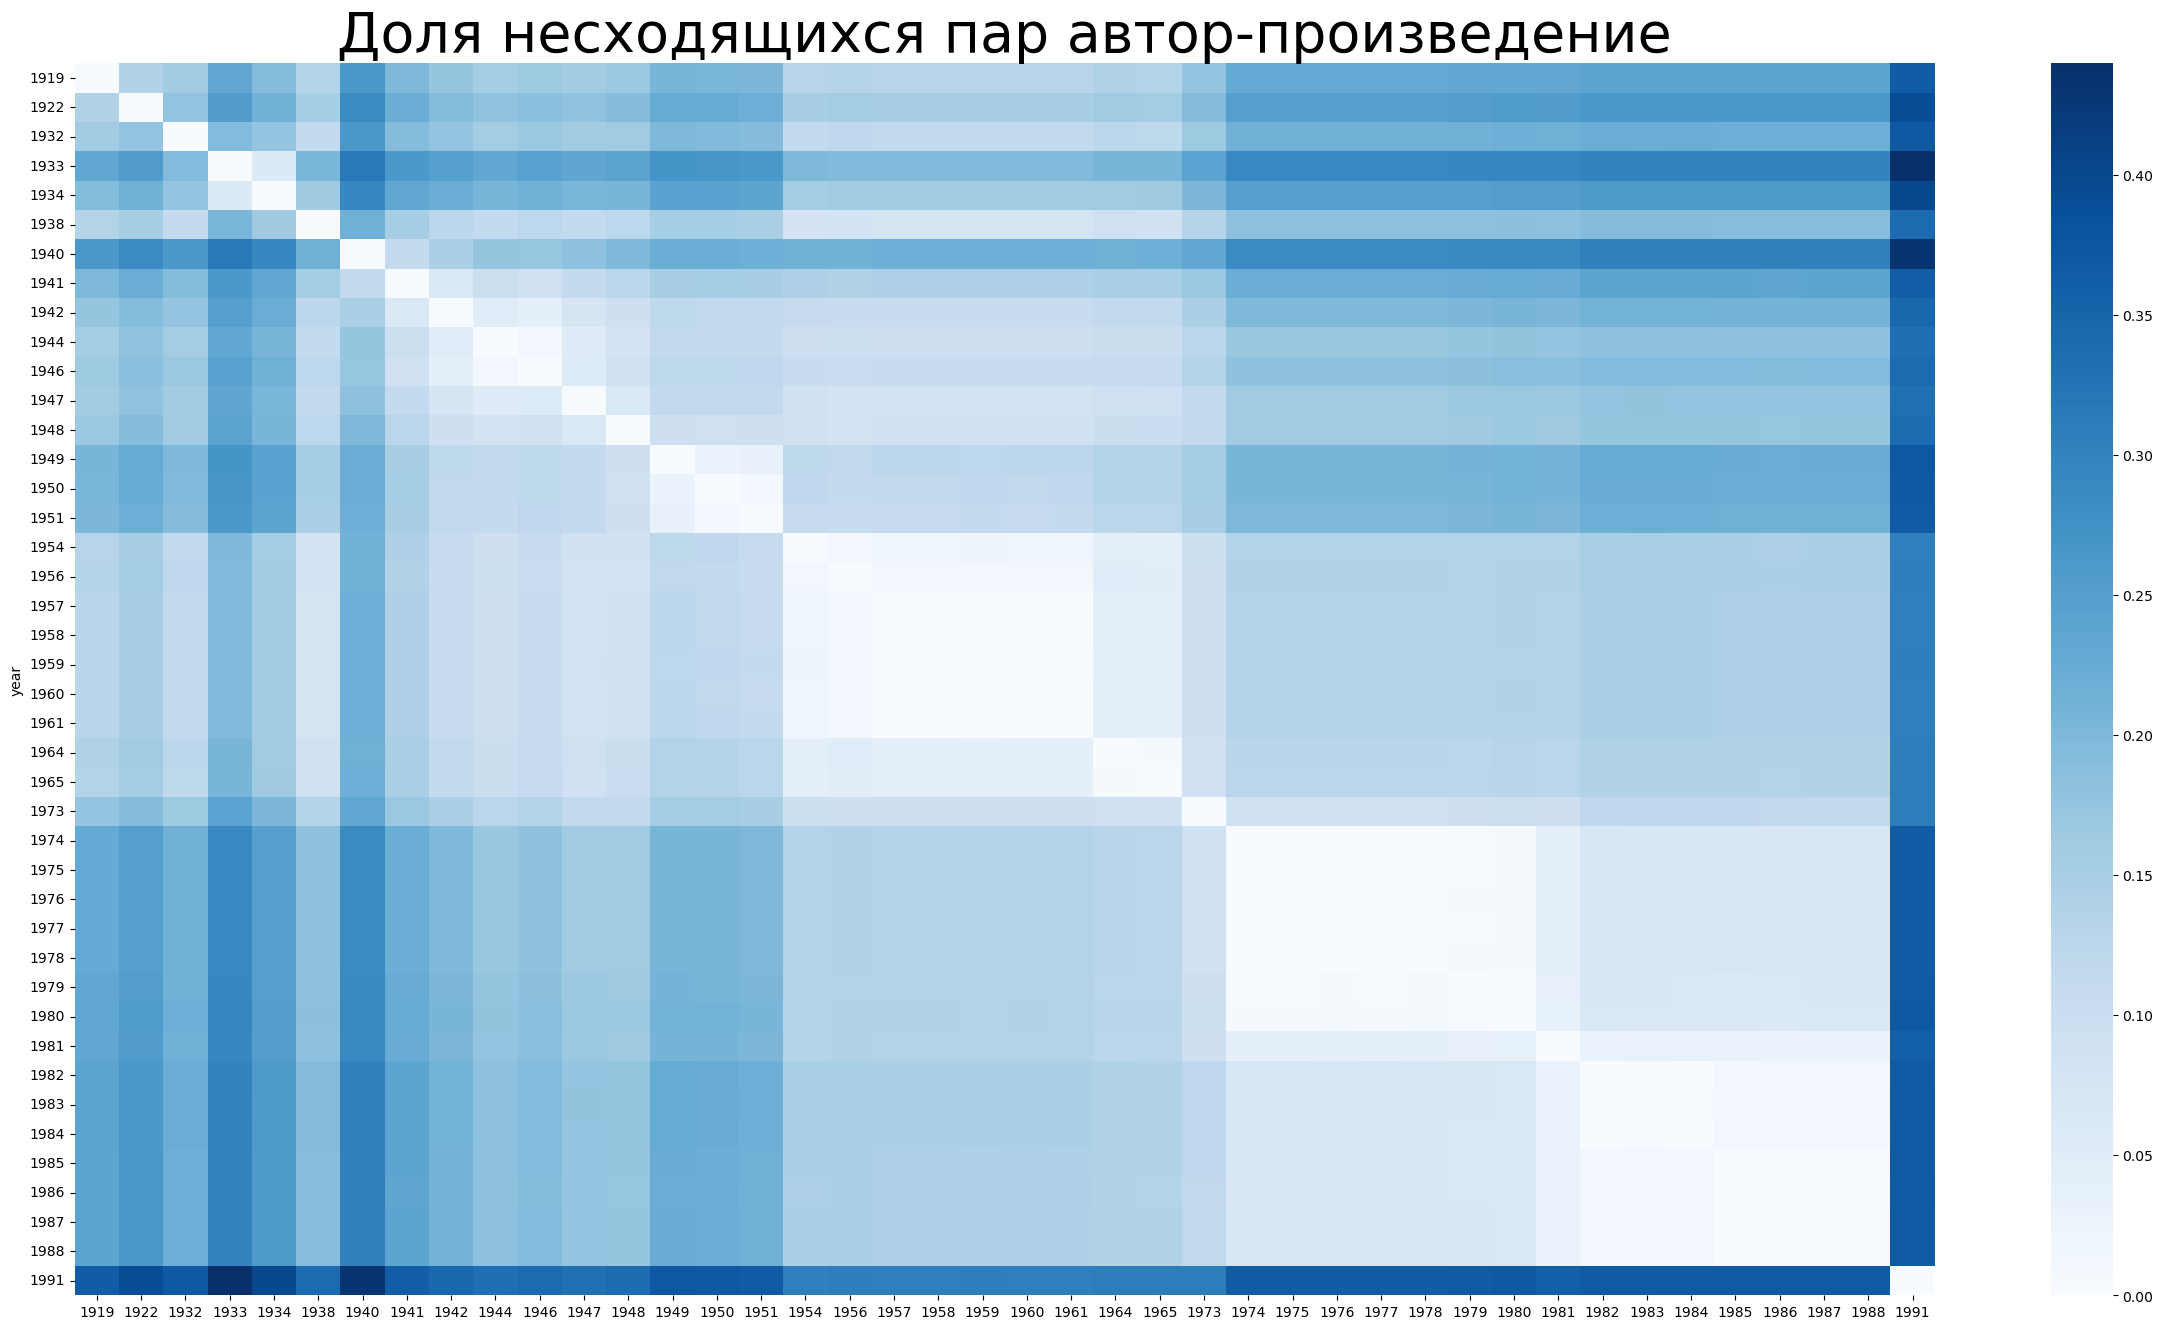

In [535]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся пар автор-произведение', fontsize = 40)
sns.heatmap(dataf2, cmap='Blues')

In [546]:
pivot_df

year                                       1919  1922  1932  1933  1934  1938  \
author                                                                          
Абашидзе И.В.                                 0     0     0     0     0     0   
Абрамов Ф.А.                                  0     0     0     0     0     0   
Аверченко А.Т.                                0     0     0     0     0     0   
Авижюс Й.                                     0     0     0     0     0     0   
Адамович А.М.                                 0     0     0     0     0     0   
Адамович Г.В.                                 0     0     0     0     0     0   
Ажаев В.Н.                                    0     0     0     0     0     0   
Айбек М.                                      0     0     0     0     0     0   
Айни С.                                       0     0     0     0     0     0   
Айтматов Ч.                                   0     0     0     0     0     0   
Акопян А.                                     0     0     0     1     0     0   
Аксаковы                                      0     1     0     0     0     0   
Аксёнов В.                                    0     0     0     0     0     0   
Александрович А.                              0     0     0     1     0     0   
Алексеев М.А.                                 0     0     0     0     0     0   
Алексеев С.П.                                 0     0     0     0     0     0   
Алигер М.И.                                   0     0     0     0     0     0   
Амп П.                                        0     0     0     1     1     0   
Андреев Л.Н.                                  1     1     0     1     1     1   
Анненский И.Ф.                                0     0     0     0     0     0   
Антокольский П.Г.                             0     0     0     0     0     0   
Антонов С.П.                                  0     0     0     0     0     0   
Антонович М.А.                                0     0     0     0     0     0   
Антоновская А.А.                              0     0     0     0     0     0   
Арбузов А.Н.                                  0     0     0     0     0     0   
Аристофан                                     1     0     0     0     0     0   
Асеев Н.Н.                                    0     0     0     0     0     1   
Астафьев В.П.                                 0     0     0     0     0     0   
Ауэзов М.                                     0     0     0     0     0     0   
Афанасьев А.                                  0     0     0     0     0     0   
Ахмадулина Б.А.                               0     0     0     0     0     0   
Ахматова А.А.                                 0     0     0     1     1     0   
Ахундов М.                                    0     0     0     0     0     0   
Бабаевский С.П.                               0     0     0     0     0     0   
Бабель И.Э.                                   0     0     0     0     0     1   
Багрицкий Э.Г.                                0     0     0     1     1     1   
Бажан М.П.                                    0     0     0     0     0     0   
Байрон Д.                                     0     0     0     1     1     0   
Бакланов Г.Я.                                 0     0     0     0     0     0   
Балашов Д.М.                                  0     0     0     0     0     0   
Бальзак О.                                    0     0     0     1     1     0   
Бальмонт К.Д.                                 1     1     0     0     0     0   
Бараташвили Н.                                0     0     0     0     0     0   
Баратынский Е.А.                              0     0     0     0     0     0   
Барбюс А.                                     0     0     0     1     1     0   
Батюшков К.Н.                                 0     0     0     0     0     0   
Бедный Д.                                     0     0     1     1     1     0   
Безыменский А.И.               

In [405]:
# с количеством произведений, а не бинарной

data = {} 
for i in pivot_df.columns:
    data[i] = []
    for j in pivot_df.columns:
        data[i].append((abs(pivot_df[i] - pivot_df[j])).sum()/len(pivot_df[1919]))
dataf2 = pd.DataFrame(data, index = pivot_df.columns)
dataf2

1919      1922      1932      1933      1934      1938      1940  \
year                                                                         
1919  0.000000  0.175705  0.156182  0.236443  0.214751  0.186551  0.271150   
1922  0.175705  0.000000  0.088937  0.223427  0.212581  0.154013  0.368764   
1932  0.156182  0.088937  0.000000  0.180043  0.151844  0.075922  0.364425   
1933  0.236443  0.223427  0.180043  0.000000  0.229935  0.162690  0.405640   
1934  0.214751  0.212581  0.151844  0.229935  0.000000  0.132321  0.488069   
1938  0.186551  0.154013  0.075922  0.162690  0.132321  0.000000  0.392625   
1940  0.271150  0.368764  0.364425  0.405640  0.488069  0.392625  0.000000   
1941  0.273319  0.279826  0.227766  0.238612  0.340564  0.253796  0.206074   
1942  0.255965  0.258134  0.208243  0.249458  0.316703  0.225597  0.295011   
1944  0.171367  0.173536  0.145336  0.206074  0.260304  0.147505  0.251627   
1946  0.236443  0.199566  0.156182  0.214751  0.264642  0.164859  0.318872   
1947  0.232104  0.219089  0.156182  0.249458  0.260304  0.130152  0.364425   
1948  0.258134  0.281996  0.164859  0.240781  0.271150  0.143167  0.318872   
1949  0.349241  0.327549  0.260304  0.336226  0.381779  0.253796  0.362256   
1950  0.331887  0.342733  0.255965  0.325380  0.366594  0.245119  0.368764   
1951  0.336226  0.334056  0.249458  0.327549  0.360087  0.234273  0.375271   
1954  0.177874  0.167028  0.112798  0.190889  0.136659  0.073753  0.331887   
1956  0.182213  0.167028  0.123644  0.223427  0.158351  0.060738  0.351410   
1957  0.184382  0.164859  0.099783  0.223427  0.149675  0.052061  0.360087   
1958  0.184382  0.164859  0.099783  0.223427  0.149675  0.052061  0.360087   
1959  0.184382  0.164859  0.099783  0.223427  0.149675  0.052061  0.360087   
1960  0.184382  0.164859  0.099783  0.223427  0.149675  0.052061  0.360087   
1961  0.184382  0.164859  0.099783  0.223427  0.149675  0.052061  0.360087   
1964  0.195228  0.171367  0.117137  0.229935  0.156182  0.069414  0.399132   
1965  0.184382  0.169197  0.123644  0.221258  0.151844  0.069414  0.355748   
1973  0.210412  0.206074  0.106291  0.286334  0.281996  0.127983  0.386117   
1974  0.203905  0.208243  0.127983  0.310195  0.240781  0.112798  0.425163   
1975  0.203905  0.208243  0.127983  0.310195  0.240781  0.112798  0.425163   
1976  0.203905  0.208243  0.127983  0.310195  0.240781  0.112798  0.425163   
1977  0.203905  0.208243  0.127983  0.310195  0.240781  0.112798  0.425163   
1978  0.203905  0.208243  0.127983  0.310195  0.240781  0.112798  0.425163   
1979  0.214751  0.212581  0.136659  0.323210  0.245119  0.117137  0.436009   
1980  0.214751  0.212581  0.136659  0.323210  0.245119  0.117137  0.436009   
1981  0.212581  0.210412  0.132321  0.321041  0.245119  0.112798  0.436009   
1982  0.203905  0.227766  0.140998  0.312364  0.223427  0.106291  0.442516   
1983  0.203905  0.227766  0.140998  0.310195  0.223427  0.106291  0.442516   
1984  0.203905  0.227766  0.140998  0.312364  0.223427  0.106291  0.442516   
1985  0.208243  0.232104  0.134490  0.308026  0.223427  0.097614  0.444685   
1986  0.208243  0.232104  0.134490  0.308026  0.223427  0.097614  0.444685   
1987  0.208243  0.232104  0.134490  0.308026  0.223427  0.097614  0.444685   
1988  0.208243  0.232104  0.134490  0.308026  0.223427  0.097614  0.444685   
1991  0.273319  0.299349  0.164859  0.375271  0.386117  0.175705  0.386117   

          1941      1942      1944  ...      1980      1981      1982  \
year                                ...                                 
1919  0.273319  0.255965  0.171367  ...  0.214751  0.212581  0.203905   
1922  0.279826  0.258134  0.173536  ...  0.212581  0.210412  0.227766   
1932  0.227766  0.208243  0.145336  ...  0.136659  0.132321  0.140998   
1933  0.238612  0.249458  0.206074  ...  0.323210  0.321041  0.312364   
1934  0.340564  0.316703  0.260304  ...  0.245119  0.245119  0.223427   
1938  0.253796  0.225597  0.147505  ...  0.117137  0.112798  0.106

In [540]:
dataf.drop('sum', axis = 1).drop('sum')

1919      1922      1932      1933      1934      1938      1940  \
year                                                                         
1919  0.000000  0.075922  0.140998  0.253796  0.223427  0.108460  0.145336   
1922  0.075922  0.000000  0.169197  0.264642  0.234273  0.127983  0.151844   
1932  0.140998  0.169197  0.000000  0.216920  0.216920  0.136659  0.186551   
1933  0.253796  0.264642  0.216920  0.000000  0.039046  0.245119  0.242950   
1934  0.223427  0.234273  0.216920  0.039046  0.000000  0.214751  0.225597   
1938  0.108460  0.127983  0.136659  0.245119  0.214751  0.000000  0.114967   
1940  0.145336  0.151844  0.186551  0.242950  0.225597  0.114967  0.000000   
1941  0.117137  0.127983  0.167028  0.236443  0.219089  0.086768  0.054230   
1942  0.110629  0.121475  0.160521  0.247289  0.229935  0.075922  0.078091   
1944  0.127983  0.147505  0.169197  0.260304  0.238612  0.097614  0.108460   
1946  0.132321  0.151844  0.173536  0.260304  0.242950  0.093275  0.104121   
1947  0.134490  0.145336  0.167028  0.258134  0.245119  0.099783  0.106291   
1948  0.136659  0.156182  0.195228  0.273319  0.255965  0.123644  0.130152   
1949  0.140998  0.164859  0.195228  0.268980  0.251627  0.119306  0.130152   
1950  0.140998  0.160521  0.195228  0.273319  0.255965  0.123644  0.117137   
1951  0.138829  0.158351  0.193059  0.271150  0.253796  0.121475  0.114967   
1954  0.088937  0.117137  0.125813  0.238612  0.216920  0.058568  0.108460   
1956  0.091106  0.119306  0.123644  0.232104  0.214751  0.078091  0.110629   
1957  0.093275  0.121475  0.125813  0.234273  0.216920  0.080260  0.112798   
1958  0.093275  0.121475  0.125813  0.234273  0.216920  0.080260  0.112798   
1959  0.093275  0.121475  0.125813  0.234273  0.216920  0.080260  0.112798   
1960  0.093275  0.121475  0.125813  0.234273  0.216920  0.080260  0.112798   
1961  0.093275  0.121475  0.125813  0.234273  0.216920  0.080260  0.112798   
1964  0.095445  0.123644  0.119306  0.227766  0.206074  0.073753  0.101952   
1965  0.095445  0.114967  0.110629  0.240781  0.219089  0.065076  0.114967   
1973  0.154013  0.173536  0.186551  0.255965  0.238612  0.127983  0.138829   
1974  0.321041  0.340564  0.353579  0.414317  0.401302  0.281996  0.275488   
1975  0.321041  0.340564  0.353579  0.414317  0.401302  0.281996  0.275488   
1976  0.321041  0.340564  0.353579  0.414317  0.401302  0.281996  0.275488   
1977  0.321041  0.340564  0.353579  0.414317  0.401302  0.281996  0.275488   
1978  0.321041  0.340564  0.353579  0.414317  0.401302  0.281996  0.275488   
1979  0.316703  0.336226  0.353579  0.414317  0.405640  0.286334  0.271150   
1980  0.325380  0.344902  0.362256  0.422993  0.414317  0.295011  0.279826   
1981  0.323210  0.342733  0.360087  0.420824  0.412148  0.292842  0.277657   
1982  0.355748  0.370933  0.392625  0.449024  0.440347  0.329718  0.310195   
1983  0.355748  0.370933  0.392625  0.449024  0.440347  0.329718  0.310195   
1984  0.355748  0.370933  0.392625  0.449024  0.440347  0.329718  0.310195   
1985  0.351410  0.366594  0.388286  0.444685  0.436009  0.325380  0.305857   
1986  0.351410  0.366594  0.388286  0.444685  0.436009  0.325380  0.305857   
1987  0.351410  0.366594  0.388286  0.444685  0.436009  0.325380  0.305857   
1988  0.351410  0.366594  0.388286  0.444685  0.436009  0.325380  0.305857   
1991  0.444685  0.442516  0.503254  0.542299  0.511931  0.440347  0.442516   

          1941      1942      1944  ...      1980      1981      1982  \
year                                ...                                 
1919  0.117137  0.110629  0.127983  ...  0.325380  0.323210  0.355748   
1922  0.127983  0.121475  0.147505  ...  0.344902  0.342733  0.370933   
1932  0.167028  0.160521  0.169197  ...  0.362256  0.360087  0.392625   
1933  0.236443  0.247289  0.260304  ...  0.422993  0.420824  0.449024   
1934  0.219089  0.229935  0.238612  ...  0.414317  0.412148  0.440347   
1938  0.086768  0.075922  0.097614  ...  0.295011  0.292842  0.329

<AxesSubplot:title={'center':'Доля несходящихся авторов'}, ylabel='year'>

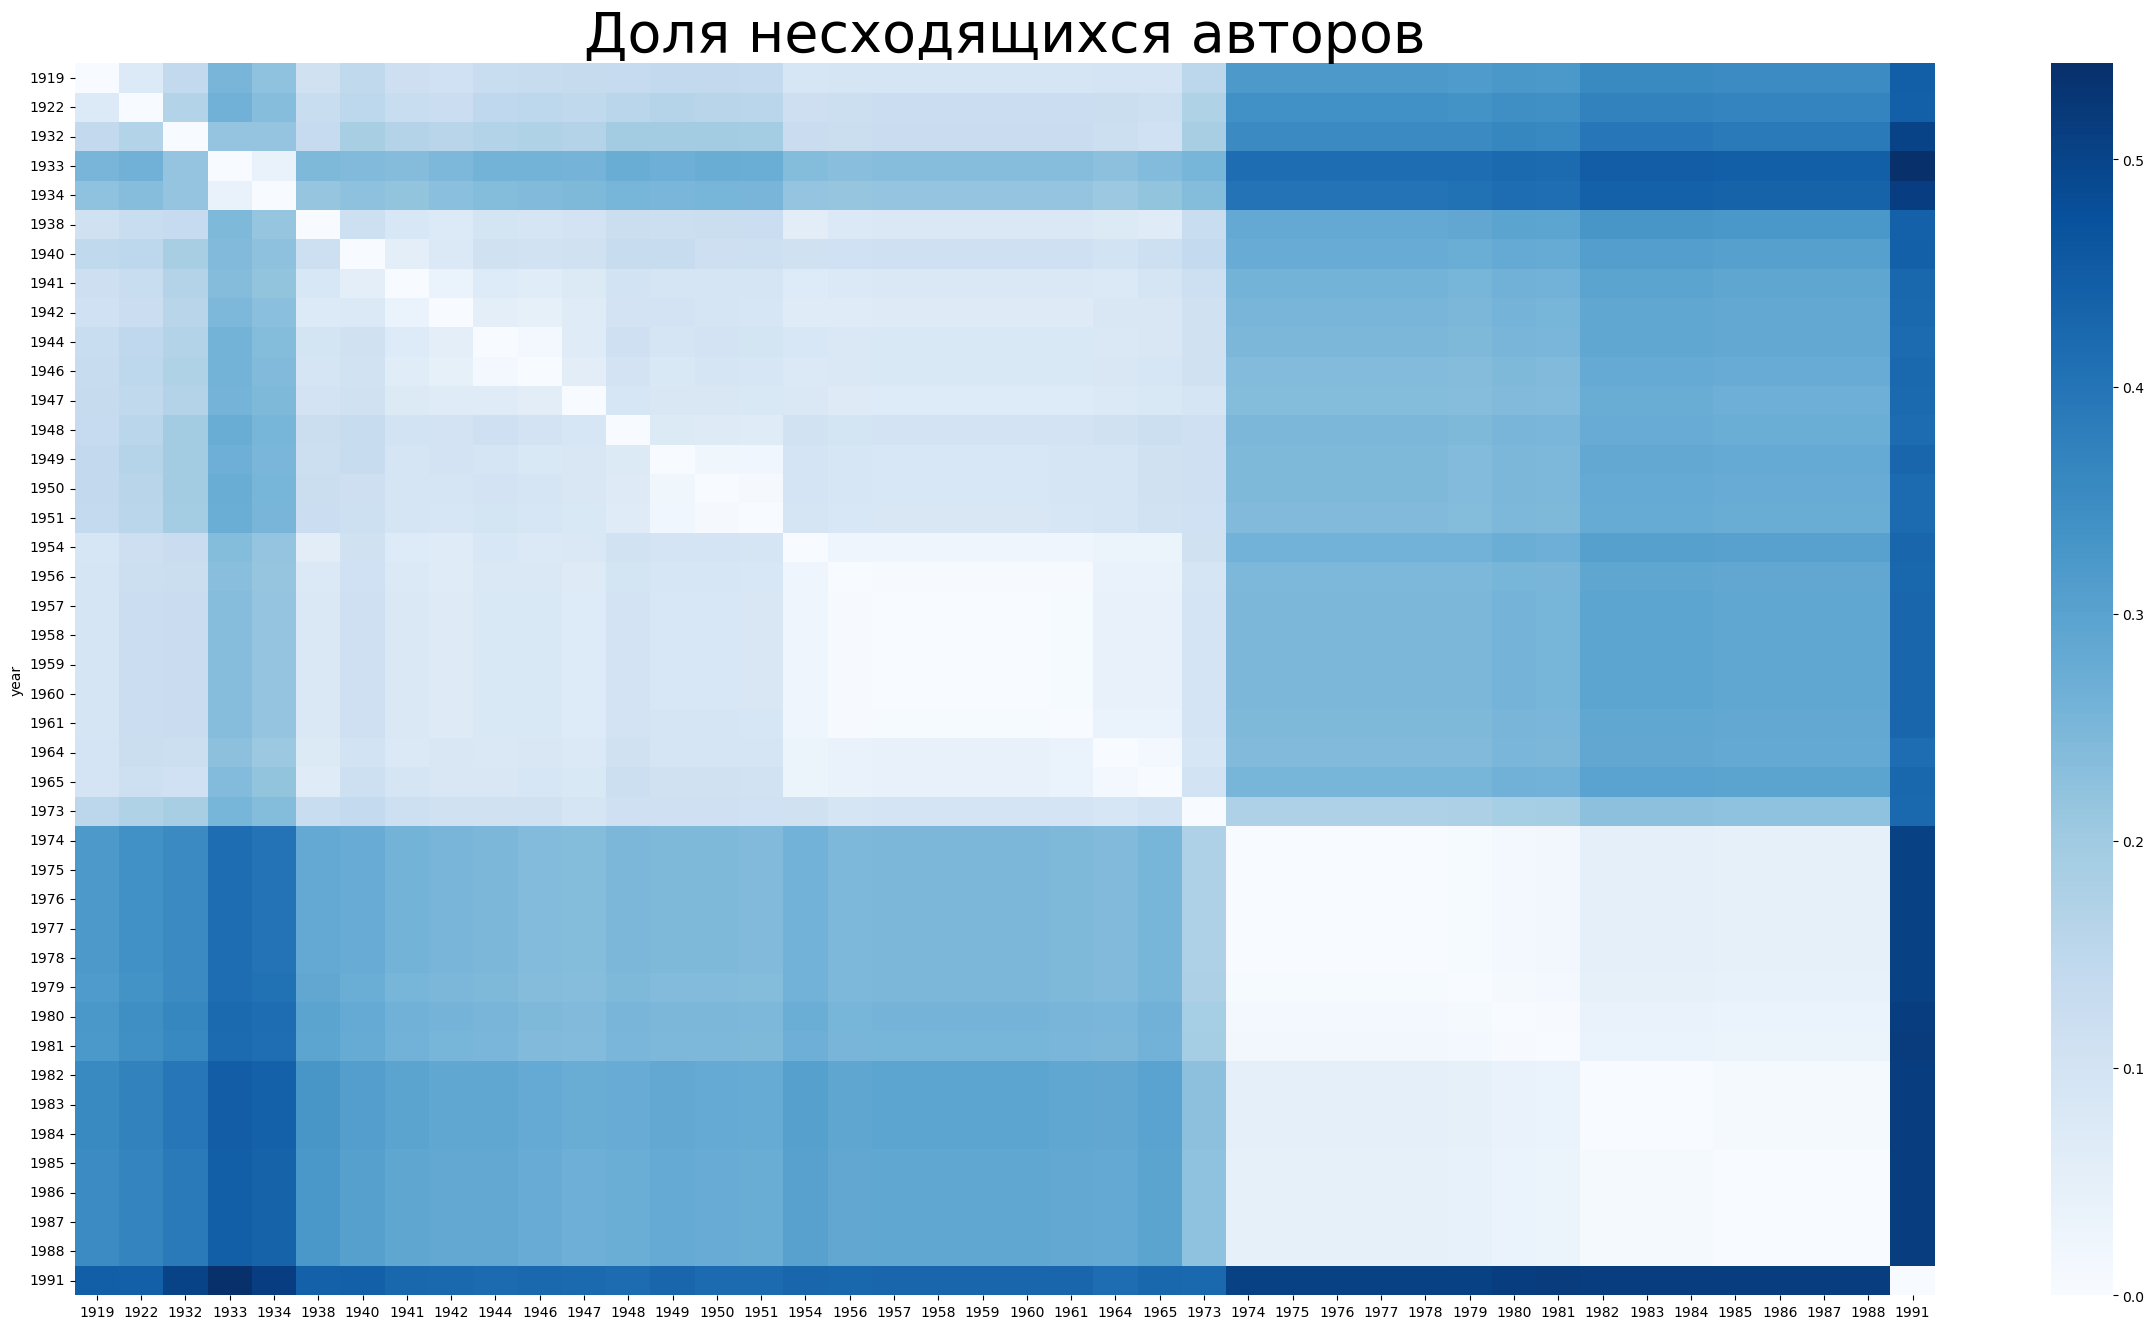

In [541]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся авторов', fontsize = 40)
sns.heatmap(dataf.drop('sum', axis = 1).drop('sum'), cmap='Blues')

In [401]:
dataf2

1919      1922      1932      1933      1934      1938      1940  \
year                                                                         
1919  0.000000  1.316703  3.123644  2.535792  3.017354  2.893709  4.522777   
1922  1.316703  0.000000  0.835141  1.277657  1.245119  1.091106  5.783080   
1932  3.123644  0.835141  0.000000  0.865510  0.689805  0.297180  6.733189   
1933  2.535792  1.277657  0.865510  0.000000  1.041215  0.691974  5.581345   
1934  3.017354  1.245119  0.689805  1.041215  0.000000  0.765727  9.008677   
1938  2.893709  1.091106  0.297180  0.691974  0.765727  0.000000  6.275488   
1940  4.522777  5.783080  6.733189  5.581345  9.008677  6.275488  0.000000   
1941  4.264642  3.477223  2.869848  2.295011  4.722343  2.362256  1.893709   
1942  4.186551  3.273319  2.633406  2.262473  4.342733  2.017354  2.885033   
1944  1.772234  1.982646  1.668113  1.806941  3.297180  1.201735  1.722343   
1946  3.724512  2.295011  1.722343  1.828633  3.305857  1.249458  3.433839   
1947  3.681128  2.388286  1.561822  2.088937  3.288503  1.106291  3.748373   
1948  3.143167  2.238612  1.370933  1.603037  2.726681  0.859002  3.221258   
1949  5.546638  4.362256  3.349241  3.208243  5.258134  2.631236  3.720174   
1950  5.268980  4.347072  3.292842  2.993492  4.895879  2.357918  3.882863   
1951  5.208243  4.208243  3.160521  2.926247  4.750542  2.229935  3.971800   
1954  3.227766  1.594360  0.819957  1.019523  1.138829  0.260304  5.295011   
1956  2.915401  1.386117  0.761388  1.203905  1.169197  0.182213  5.357918   
1957  3.199566  1.357918  0.568330  1.299349  1.112798  0.134490  5.609544   
1958  3.199566  1.357918  0.568330  1.299349  1.112798  0.134490  5.609544   
1959  3.199566  1.357918  0.568330  1.299349  1.112798  0.134490  5.609544   
1960  3.199566  1.357918  0.568330  1.299349  1.112798  0.134490  5.609544   
1961  3.199566  1.357918  0.568330  1.299349  1.112798  0.134490  5.609544   
1964  3.383948  1.577007  0.793926  1.336226  1.305857  0.260304  5.665944   
1965  3.364425  1.579176  0.830803  1.401302  1.357918  0.260304  5.475054   
1973  3.416486  1.746204  0.683297  1.709328  2.073753  0.696312  5.336226   
1974  3.075922  1.739696  0.917570  2.006508  1.915401  0.568330  5.557484   
1975  3.075922  1.739696  0.917570  2.006508  1.915401  0.568330  5.557484   
1976  3.075922  1.739696  0.917570  2.006508  1.915401  0.568330  5.557484   
1977  3.075922  1.739696  0.917570  2.006508  1.915401  0.568330  5.557484   
1978  3.075922  1.739696  0.917570  2.006508  1.915401  0.568330  5.557484   
1979  3.156182  1.774403  0.947939  2.067245  1.924078  0.581345  5.611714   
1980  3.156182  1.774403  0.947939  2.067245  1.924078  0.581345  5.611714   
1981  3.110629  1.711497  0.878525  2.008677  1.841649  0.537961  5.689805   
1982  3.006508  1.650759  0.787419  1.735358  1.503254  0.383948  5.904555   
1983  3.006508  1.650759  0.787419  1.733189  1.503254  0.383948  5.904555   
1984  3.006508  1.650759  0.787419  1.735358  1.503254  0.383948  5.904555   
1985  3.036876  1.702820  0.789588  1.778742  1.550976  0.357918  5.841649   
1986  3.036876  1.702820  0.789588  1.778742  1.550976  0.357918  5.841649   
1987  3.036876  1.702820  0.789588  1.778742  1.550976  0.357918  5.841649   
1988  3.036876  1.702820  0.789588  1.778742  1.550976  0.357918  5.841649   
1991  3.770065  2.915401  1.787419  3.229935  4.216920  1.594360  4.581345   

          1941      1942      1944  ...      1980      1981      1982  \
year                                ...                                 
1919  4.264642  4.186551  1.772234  ...  3.156182  3.110629  3.006508   
1922  3.477223  3.273319  1.982646  ...  1.774403  1.711497  1.650759   
1932  2.869848  2.633406  1.668113  ...  0.947939  0.878525  0.787419   
1933  2.295011  2.262473  1.806941  ...  2.067245  2.008677  1.735358   
1934  4.722343  4.342733  3.297180  ...  1.924078  1.841649  1.503254   
1938  2.362256  2.017354  1.201735  ...  0.581345  0.537961  0.383

<AxesSubplot:title={'center':'Доля несходящихся авторов'}, ylabel='year'>

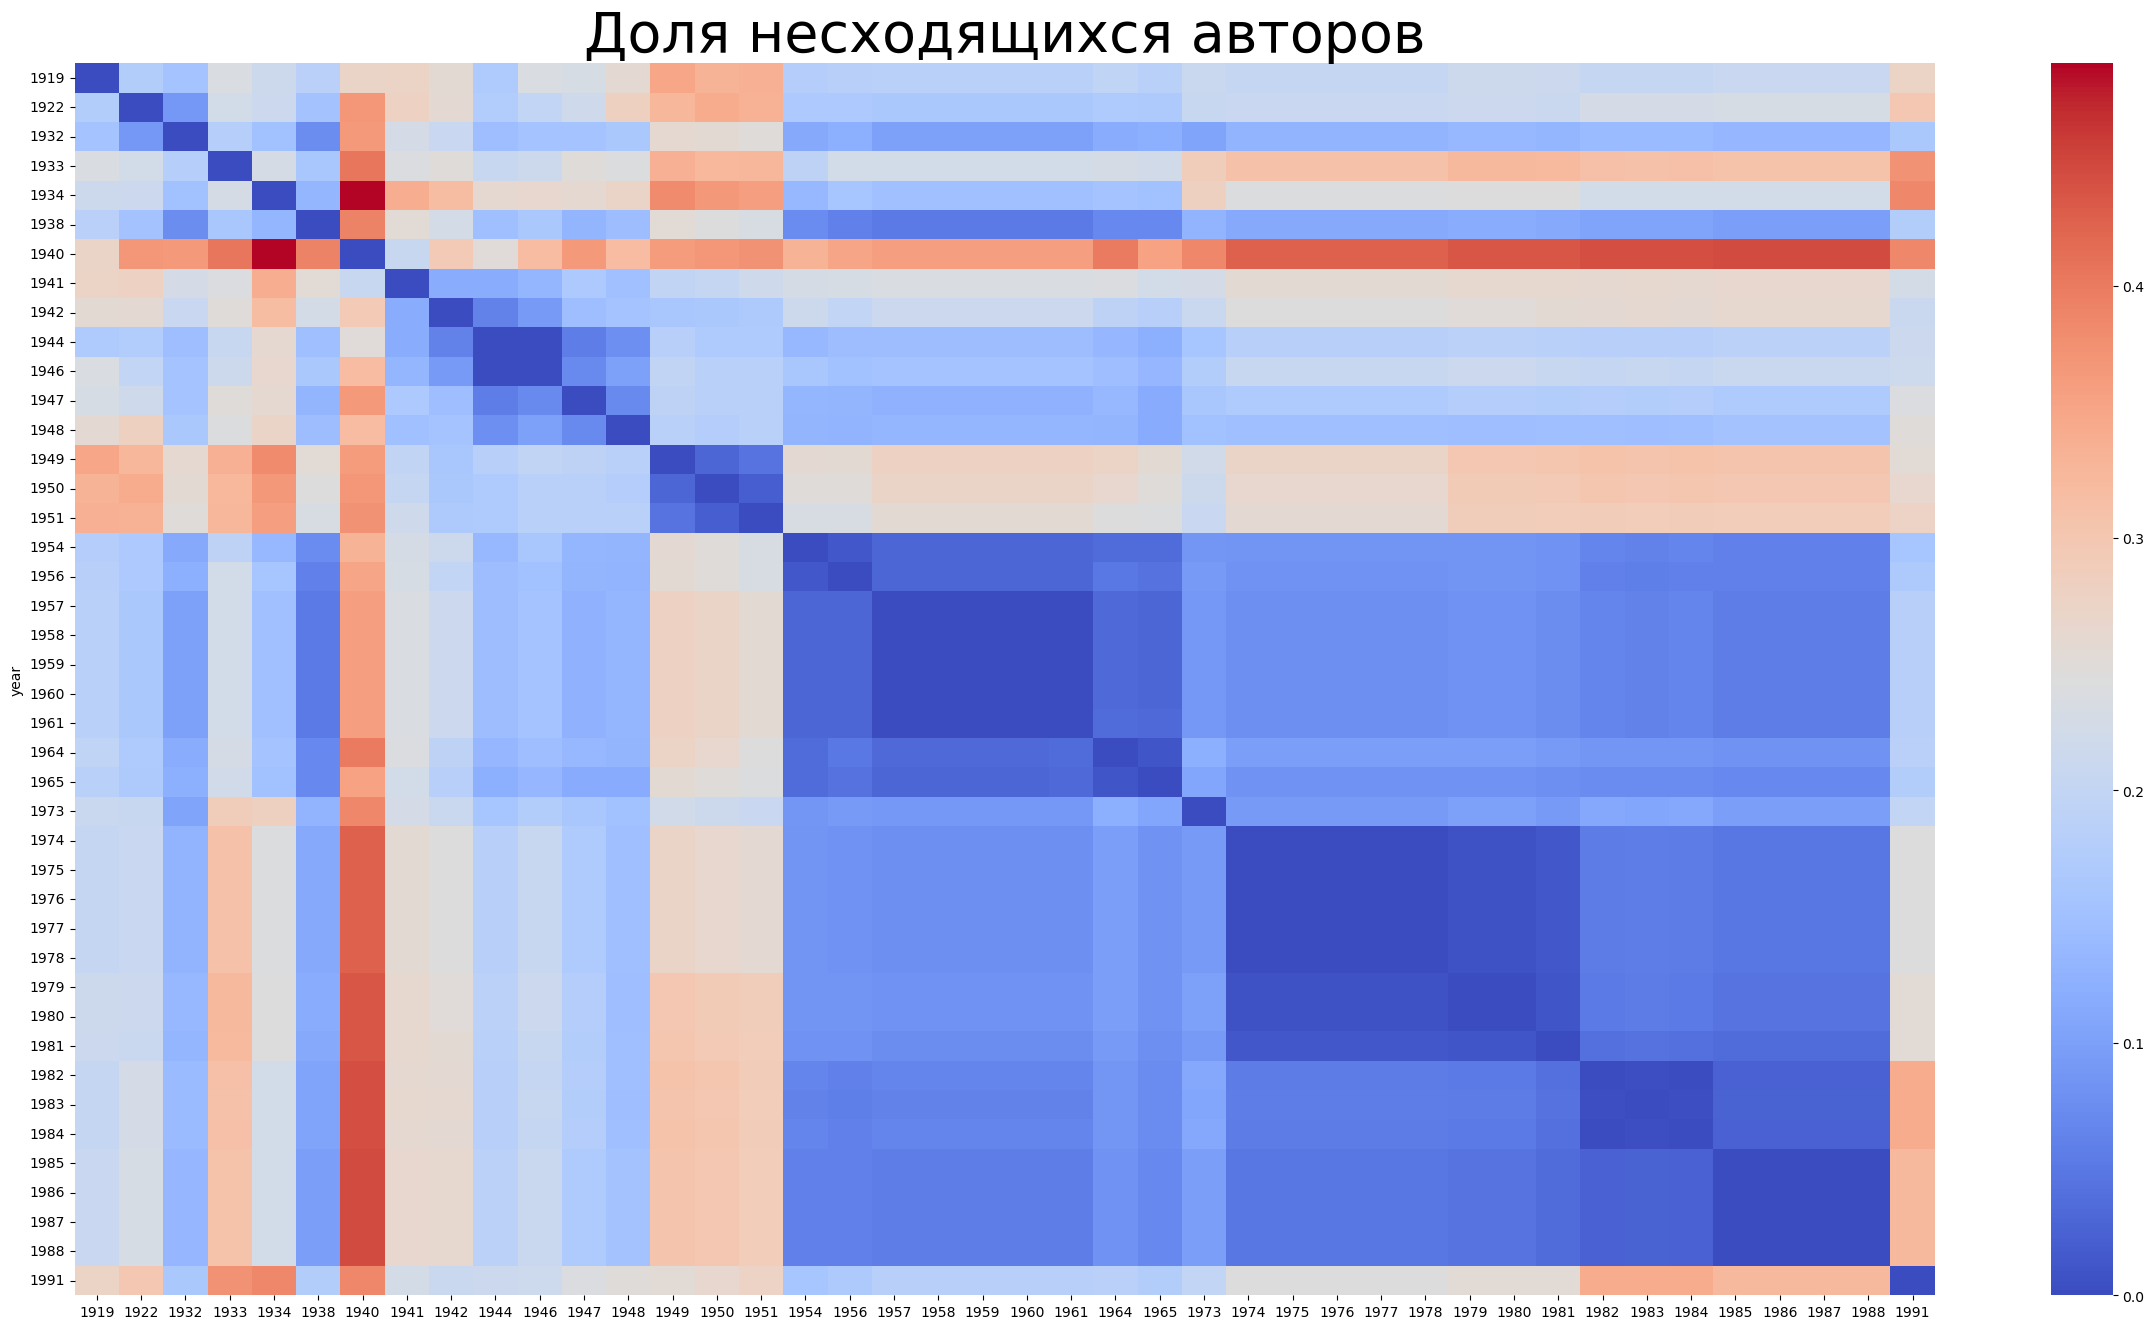

In [406]:
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся авторов', fontsize = 40)
sns.heatmap(dataf2, cmap='coolwarm')

In [263]:
pd.set_option('display.max_rows', 25)

<AxesSubplot:title={'center':'Доля несходящихся произведений'}, ylabel='year'>

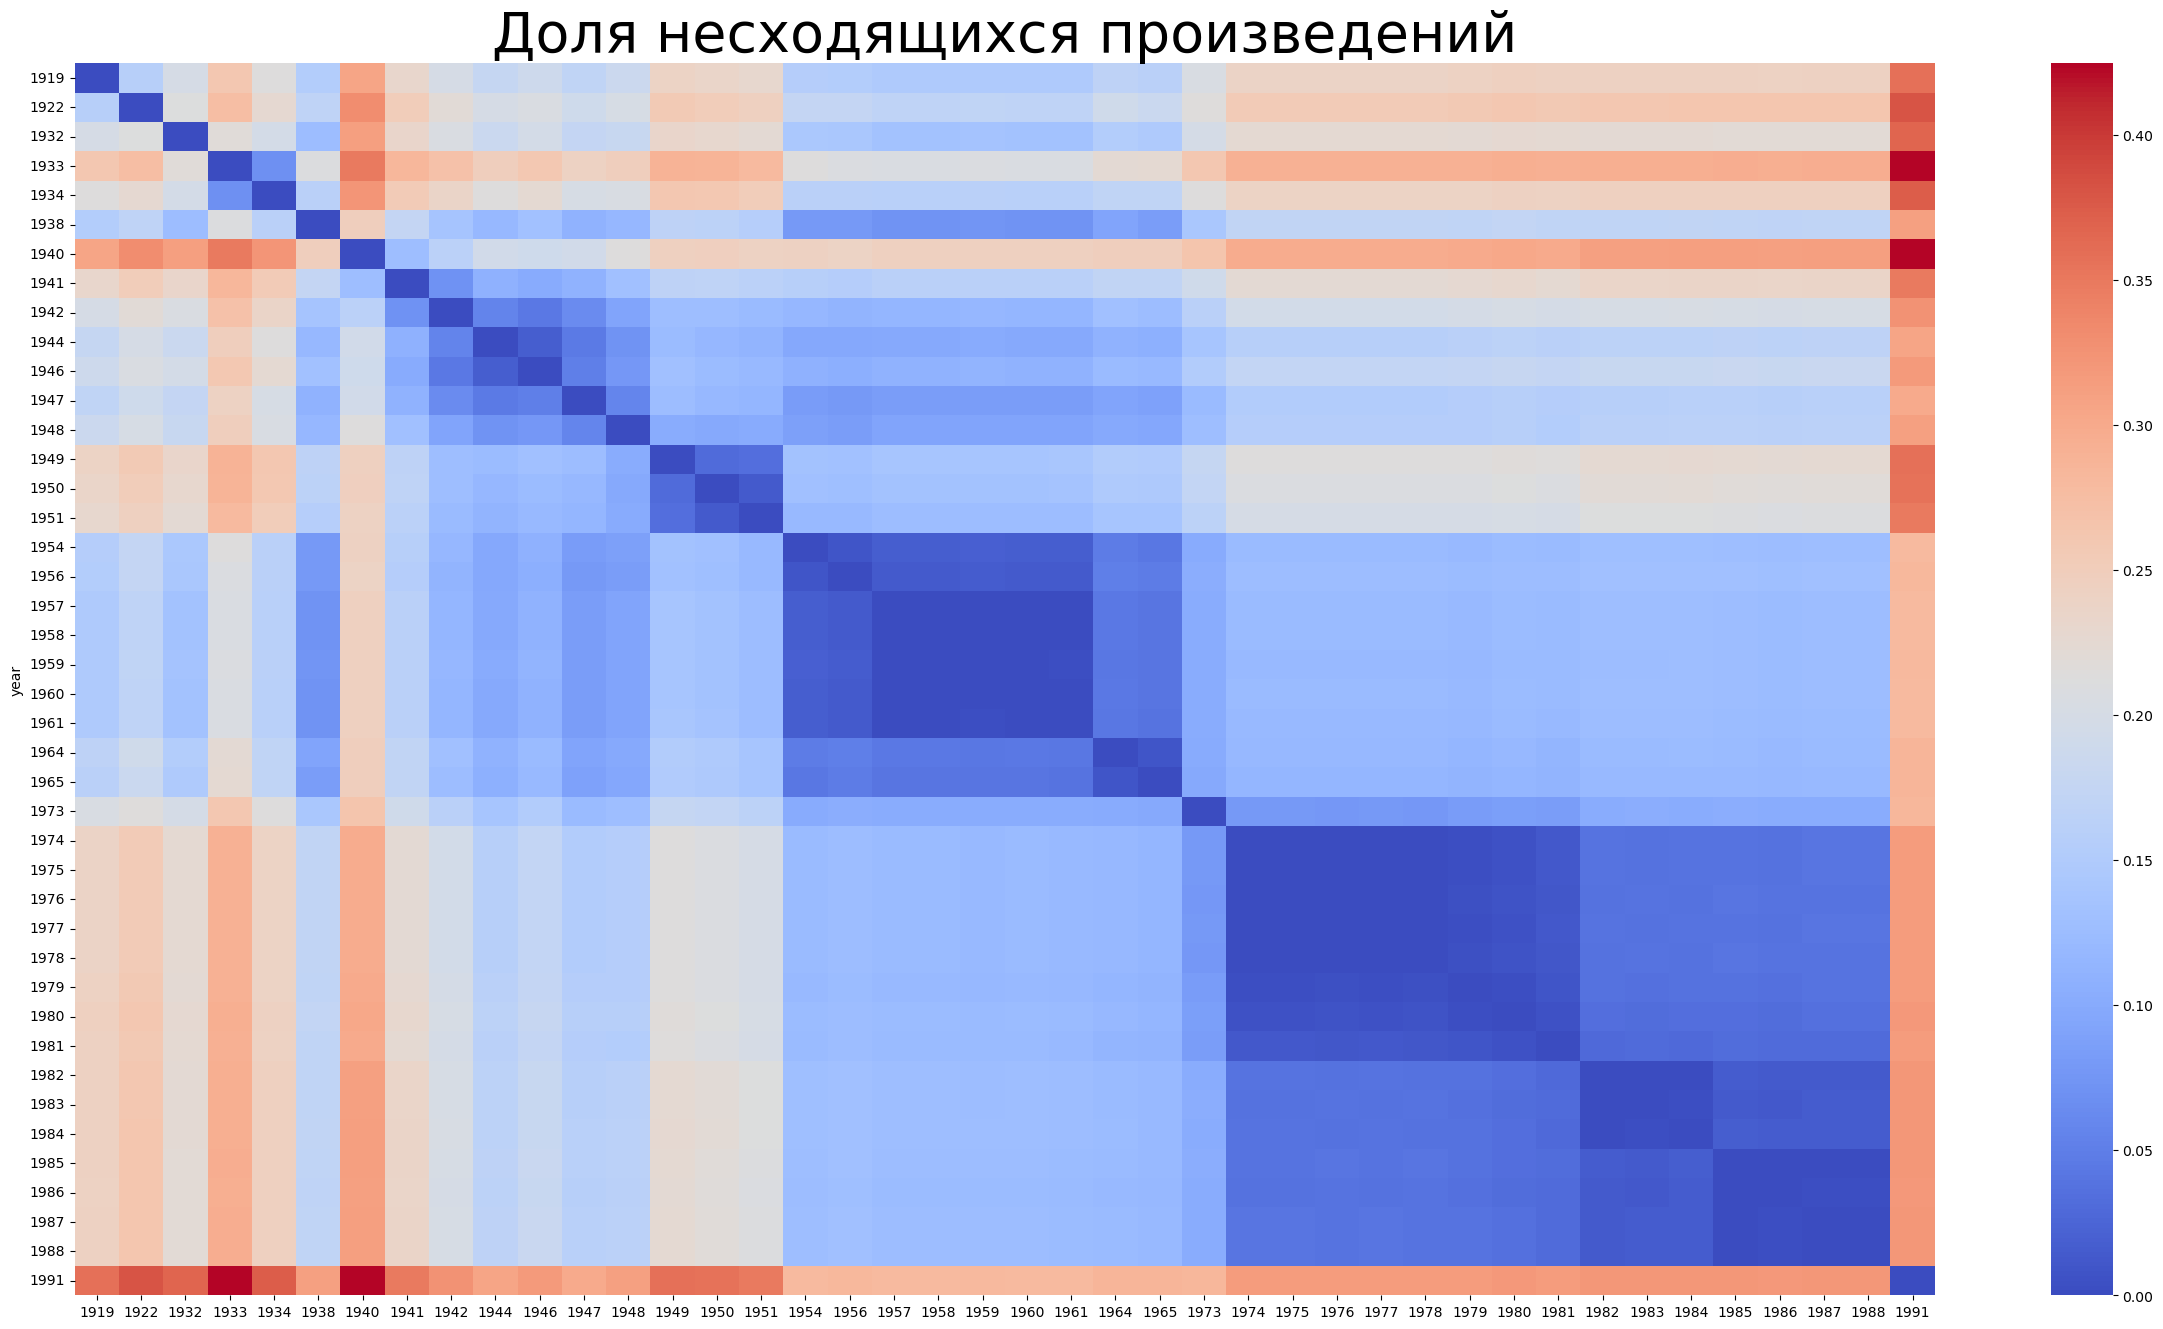

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 16))
plt.title('Доля несходящихся произведений', fontsize = 40)
sns.heatmap(dataf1, cmap='coolwarm')